In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
Fertility_rate = pd.read_csv('Cleaned Data/Fertility_rate.CSV')
Chinese_gdp_data = pd.read_csv('Cleaned Data/CN_GDP_Overall_data.csv')
Japanese_gdp_data = pd.read_csv('Cleaned Data/JP_GDP_Overall_data.csv')
JP_demo = pd.read_csv('Cleaned Data/JP_demo.csv')
CN_demo = pd.read_csv('Cleaned Data/CN_demo.csv')
GDP = pd.read_csv('Cleaned Data/gdp_df.csv') 
GDP_Growth= pd.read_csv('Cleaned Data/gdp_df_growth.csv') 
GDP_Per_Capita = pd.read_csv('Cleaned Data/gpd_per_capita_df.csv') 
GDP_Per_Capita_Growth = pd.read_csv('Cleaned Data/gdp_per_capita_growth_df.csv')
Age_14under= pd.read_csv('Cleaned Data/Age_14under.csv')
Working_population_percentage = pd.read_csv('Cleaned Data/Working_population_percentage.csv')
Age_15to64 = pd.read_csv('Cleaned Data/Age_15to64.csv')
Age_64above = pd.read_csv('Cleaned Data/Age_64above.csv')

In [3]:
Fertility_rate.set_index('Year', inplace = True)
Age_15to64.set_index('Year', inplace = True)
Age_14under.set_index('Year', inplace = True)
Age_64above.set_index('Year', inplace = True)
GDP.set_index('Year',inplace = True)
GDP_Growth.set_index('Year',inplace = True)
GDP_Per_Capita.set_index('Year',inplace = True)
GDP_Per_Capita_Growth.set_index('Year',inplace = True)
Working_population_percentage.set_index('Year', inplace = True)

Text(0.5, 1.0, 'Chinese and Japanese Fertility rate')

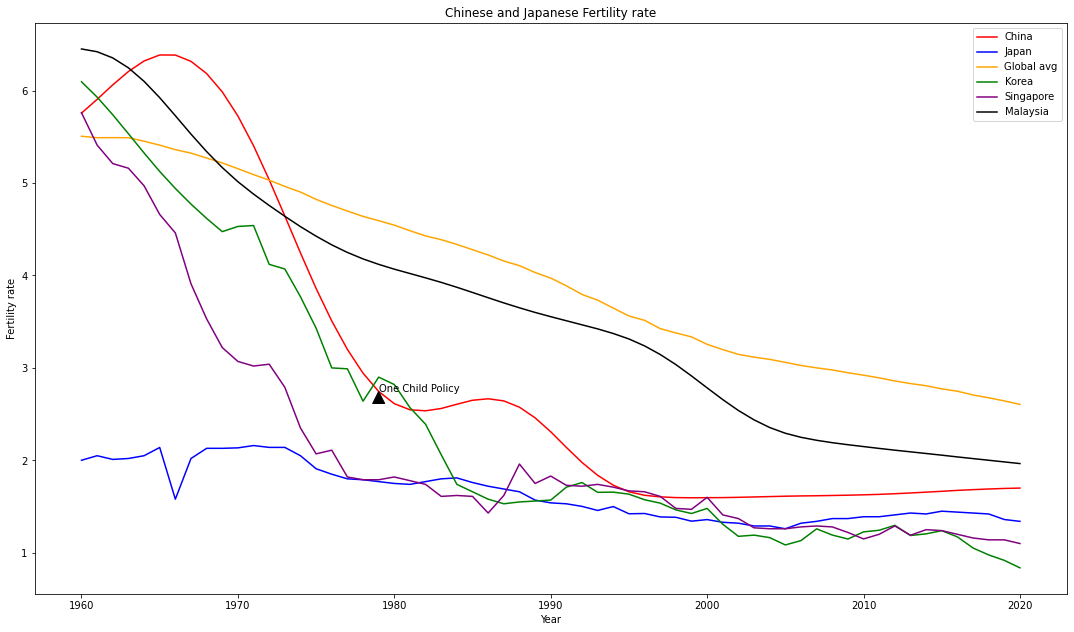

In [4]:
#Fertility rate between two countries and global average 
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(Fertility_rate.index,Fertility_rate['China Fertility rate, total (births per woman)'], 'red')
ax.annotate('One Child Policy', xy = (1979, 2.745), arrowprops=dict(facecolor='black'))
ax.plot(Fertility_rate['Japan Fertility rate, total (births per woman)'], 'blue')
ax.plot(Fertility_rate['Fertility Rate'], 'orange')
ax.plot(Fertility_rate['Korea Fertility rate, total (births per woman)'], 'green')
ax.plot(Fertility_rate['Singapore Fertility rate, total (births per woman)'], 'purple')
ax.plot(Fertility_rate['Malaysia Fertility rate, total (births per woman)'], 'black')
ax.legend(['China', 'Japan', 'Global avg', 'Korea', 'Singapore', 'Malaysia'])
ax.set_xlabel('Year')
ax.set_ylabel('Fertility rate')
ax.set_title('Chinese and Japanese Fertility rate')

In [5]:
Non_working = (Age_14under+ Age_64above)
Ratio_WNK = Working_population_percentage/Non_working
Ratio_WNK.reset_index(inplace = True)
Ratio_WNK

,Year,China,D Rate,Japan,Korea,Malaysia,Singapore,Unnamed: 0
0,1960,1.770247,NaN,1.559690,1.872845,1.957366,1.827257,NaN
1,1961,1.772600,NaN,1.541739,1.889081,1.966152,1.854715,NaN
2,1962,1.784338,NaN,1.522419,1.894278,1.975264,1.871040,NaN
3,1963,1.798777,NaN,1.502996,1.891773,1.981893,1.875892,NaN
4,1964,1.806736,NaN,1.485572,1.886879,1.982618,1.871746,NaN
...,...,...,...,...,...,...,...,...
56,2016,1.384989,NaN,1.653061,1.366790,1.447584,1.283001,NaN
57,2017,1.394359,NaN,1.664555,1.371323,1.444622,1.295209,NaN
58,2018,1.404453,NaN,1.674291,1.377256,1.442312,1.311332,NaN
59,2019,1.413961,NaN,1.682796,1.385169,1.441249,1.328456,NaN


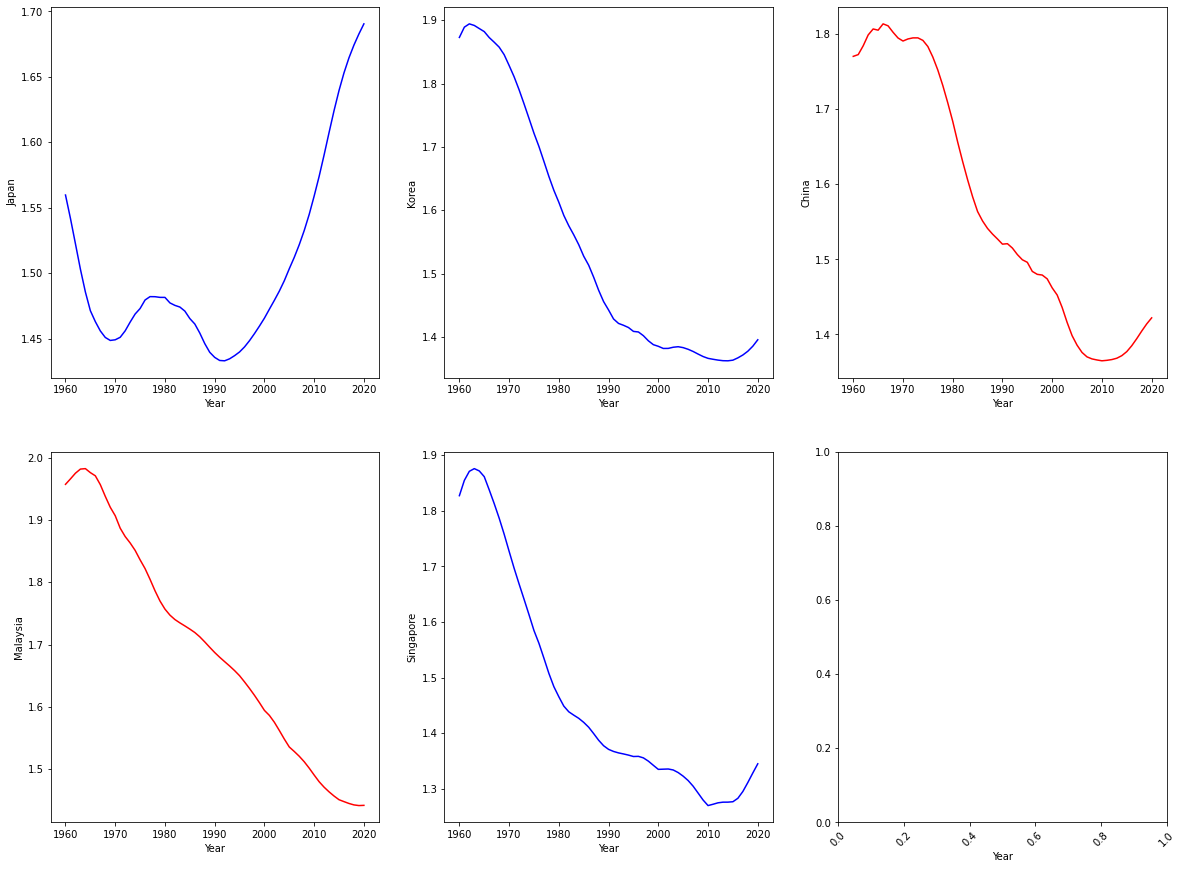

In [23]:
#Looking at the ratio between Working population percetnage and Non-Working population percentage
fig, ax = plt.subplots(2,3, figsize = (20,15))
sns.lineplot(ax = ax[0,0],data = Ratio_WNK, x = 'Year', y = 'Japan', color = 'Blue')
sns.lineplot(ax = ax[0,1],data = Ratio_WNK, x = 'Year', y = 'Korea', color = 'Blue')
sns.lineplot(ax = ax[0,2],data = Ratio_WNK, x = 'Year', y = 'China', color = 'Red')
sns.lineplot(ax = ax[1,0],data = Ratio_WNK, x = 'Year', y = 'Malaysia', color = 'Red')
sns.lineplot(ax = ax[1,1],data = Ratio_WNK, x = 'Year', y = 'Singapore', color = 'Blue')
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.show()

The ratio between Working population and non-working population have increased expotentially in Japan.
This would indicate Japan has a large working population. While other countries has similar ratio between each other, which is small compare to Japan. 
We can go back and use this data but this shows Japan is in an unique situation of itself.

Text(0.5, 1.0, 'GDP}')

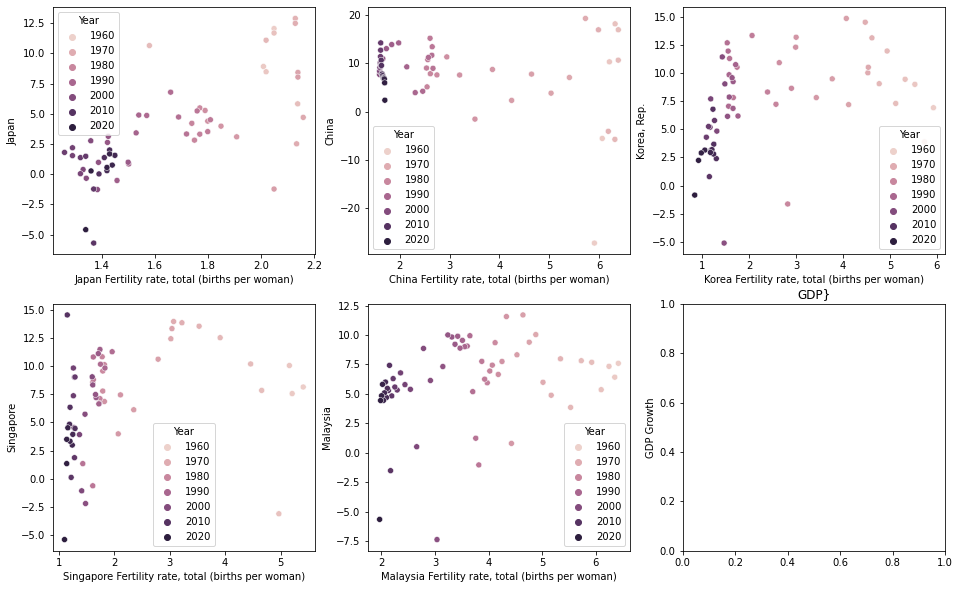

In [25]:
#Looking at relationship between Fertility rate and GDP Growth
df = pd.merge(Fertility_rate, GDP_Growth, how ='left', on = 'Year')
fig, ax = plt.subplots(2,3, figsize = (16, 10))
sns.scatterplot(ax = ax[0,0],y= 'Japan',  x= 'Japan Fertility rate, total (births per woman)', data = df, hue ='Year')
sns.scatterplot(ax = ax[0,1],y = 'China',  x= 'China Fertility rate, total (births per woman)', data = df, hue ='Year')
sns.scatterplot(ax = ax[0,2],y = 'Korea, Rep.',  x= 'Korea Fertility rate, total (births per woman)', data = df, hue ='Year')
sns.scatterplot(ax = ax[1,0],y = 'Singapore',  x= 'Singapore Fertility rate, total (births per woman)', data = df, hue ='Year')
sns.scatterplot(ax = ax[1,1],y = 'Malaysia',  x= 'Malaysia Fertility rate, total (births per woman)', data = df, hue ='Year')
plt.ylabel('GDP Growth')

The relationship between Fertility rate and GDP growth doesn't seem to have any strong correlation

<AxesSubplot:xlabel='Malaysia 64+', ylabel='Malaysia GDP Growth'>

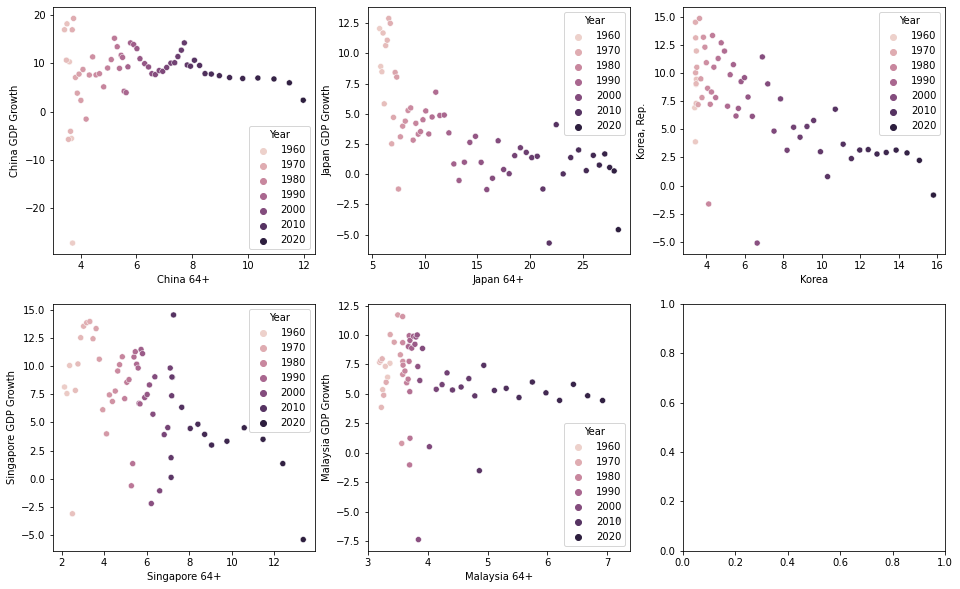

In [12]:
#Looking at the relationship between 64+ population and GDP Growth
df = pd.merge(Age_64above, GDP_Growth, how ='left', on = 'Year', suffixes = [' 64+', ' GDP Growth'])
fig, axes = plt.subplots(2,3, figsize = (16, 10))
sns.scatterplot(ax = axes[0,0], x= 'China 64+', y ='China GDP Growth', data = df, hue = 'Year')
sns.scatterplot(ax = axes[0,1], x= 'Japan 64+', y ='Japan GDP Growth', data = df,  hue = 'Year')
sns.scatterplot(ax = axes[0,2], x= 'Korea', y ='Korea, Rep.', data = df,  hue = 'Year')
sns.scatterplot(ax = axes[1,0], x= 'Singapore 64+', y ='Singapore GDP Growth', data = df, hue = 'Year')
sns.scatterplot(ax =axes[1,1], x = 'Malaysia 64+', y ='Malaysia GDP Growth', data = df, hue = 'Year') 

GDP growth. One interesting thing is that for high income country, Japan, Korea, and Singapore, there seems to be correlation between GDP Growth decreasing with the increase in aging population. 

<AxesSubplot:xlabel='Malaysia 64+', ylabel='Malaysia GDP Capita Growth'>

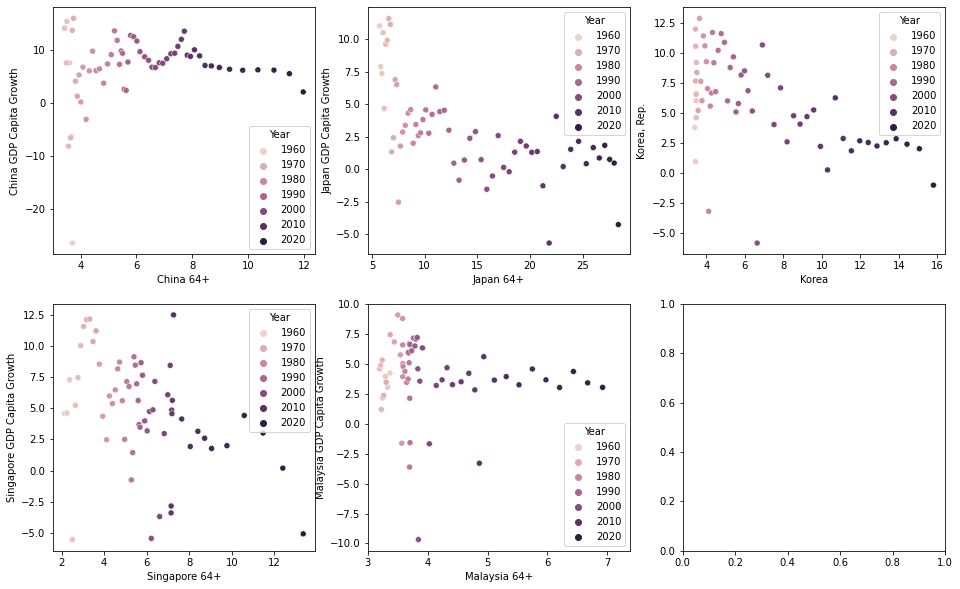

In [9]:
#Looking at the relationship between 64+ population and GDP Per Capita Growth
df = pd.merge(Age_64above, GDP_Per_Capita_Growth, how ='left', on = 'Year', suffixes = [' 64+', ' GDP Capita Growth'])
fig, axes = plt.subplots(2,3, figsize = (16, 10))
sns.scatterplot(ax = axes[0,0], x= 'China 64+', y ='China GDP Capita Growth', data = df, hue = 'Year')
sns.scatterplot(ax = axes[0,1], x= 'Japan 64+', y ='Japan GDP Capita Growth', data = df,  hue = 'Year')
sns.scatterplot(ax = axes[0,2], x= 'Korea', y ='Korea, Rep.', data = df,  hue = 'Year')
sns.scatterplot(ax = axes[1,0], x= 'Singapore 64+', y ='Singapore GDP Capita Growth', data = df, hue = 'Year')
sns.scatterplot(ax =axes[1,1], x = 'Malaysia 64+', y ='Malaysia GDP Capita Growth', data = df, hue = 'Year') 

Similar trend can be seen with GDP per Capita Growth.

<AxesSubplot:xlabel='Malaysia Working Pop', ylabel='Malaysia GDP Capita Growth'>

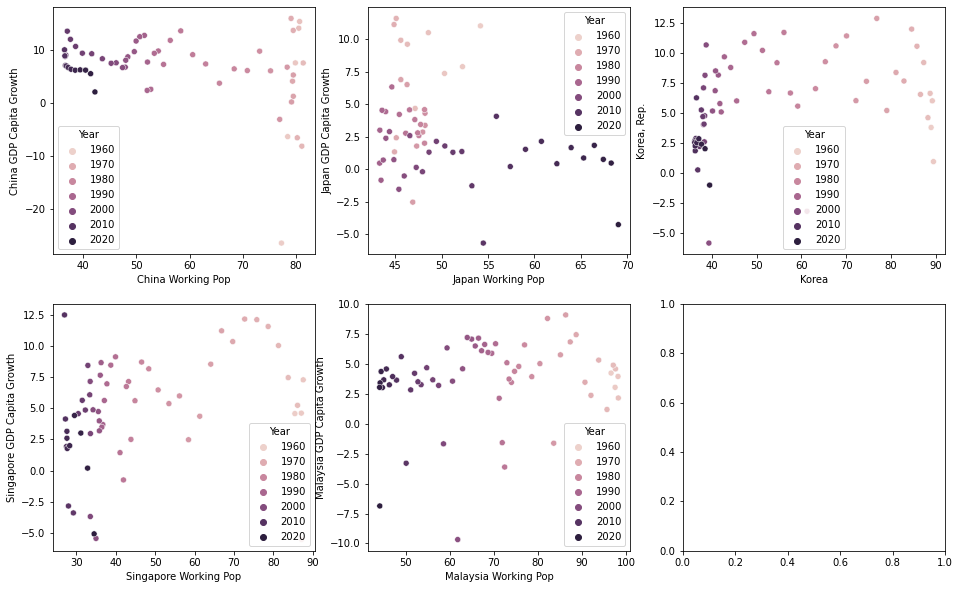

In [10]:
##Looking at the relationship between working population percentage and GDP Growth
df = pd.merge(Working_population_percentage, GDP_Per_Capita_Growth, how ='left', on = 'Year', suffixes = [' Working Pop', ' GDP Capita Growth'])
fig, axes = plt.subplots(2,3, figsize = (16, 10))
sns.scatterplot(ax = axes[0,0], x= 'China Working Pop', y ='China GDP Capita Growth', data = df, hue = 'Year')
sns.scatterplot(ax = axes[0,1], x= 'Japan Working Pop', y ='Japan GDP Capita Growth', data = df,  hue = 'Year')
sns.scatterplot(ax = axes[0,2], x= 'Korea', y ='Korea, Rep.', data = df,  hue = 'Year')
sns.scatterplot(ax = axes[1,0], x= 'Singapore Working Pop', y ='Singapore GDP Capita Growth', data = df, hue = 'Year')
sns.scatterplot(ax =axes[1,1], x = 'Malaysia Working Pop', y ='Malaysia GDP Capita Growth', data = df, hue = 'Year') 

Working age population does not seem to have weak correlation.

<AxesSubplot:xlabel='Malaysia 14 under', ylabel='Malaysia GDP Capita Growth'>

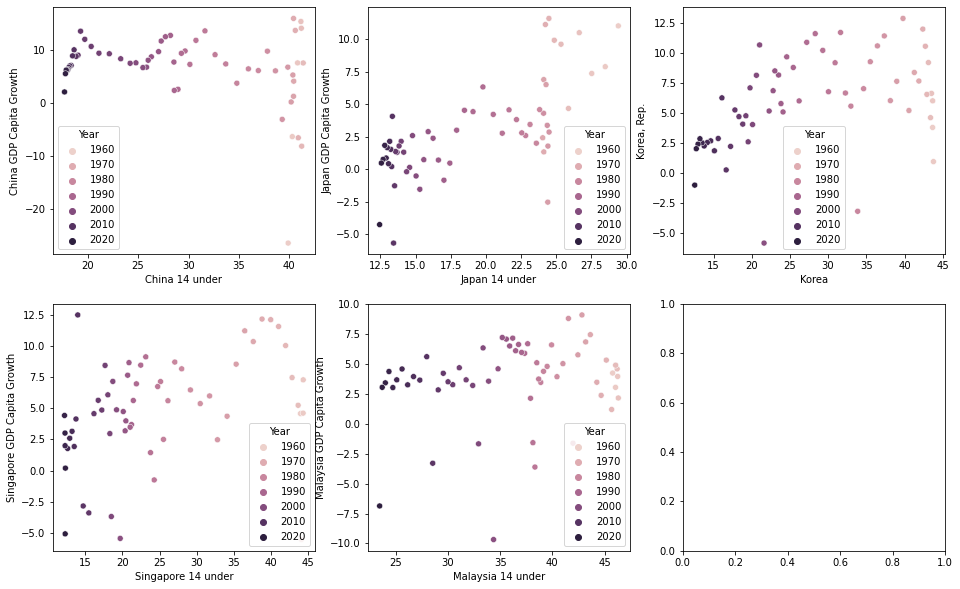

In [11]:
##Looking at the relationship between Age14 and under group and GDP Growth
df = pd.merge(Age_14under, GDP_Per_Capita_Growth, how ='left', on = 'Year', suffixes = [' 14 under', ' GDP Capita Growth'])
fig, axes = plt.subplots(2,3, figsize = (16, 10))
sns.scatterplot(ax = axes[0,0], x= 'China 14 under', y ='China GDP Capita Growth', data = df, hue = 'Year')
sns.scatterplot(ax = axes[0,1], x= 'Japan 14 under', y ='Japan GDP Capita Growth', data = df,  hue = 'Year')
sns.scatterplot(ax = axes[0,2], x= 'Korea', y ='Korea, Rep.', data = df,  hue = 'Year')
sns.scatterplot(ax = axes[1,0], x= 'Singapore 14 under', y ='Singapore GDP Capita Growth', data = df, hue = 'Year')
sns.scatterplot(ax =axes[1,1], x = 'Malaysia 14 under', y ='Malaysia GDP Capita Growth', data = df, hue = 'Year') 

In [20]:
Age64_Past = Age_64above.loc[1960:1990]
GDP_Growth_past = GDP_Growth.loc[196:1990]
GDP_Per_Capita_Growth_past = GDP_Per_Capita_Growth.loc[196:1990]

<AxesSubplot:xlabel='Malaysia 64+', ylabel='Malaysia GDP Growth'>

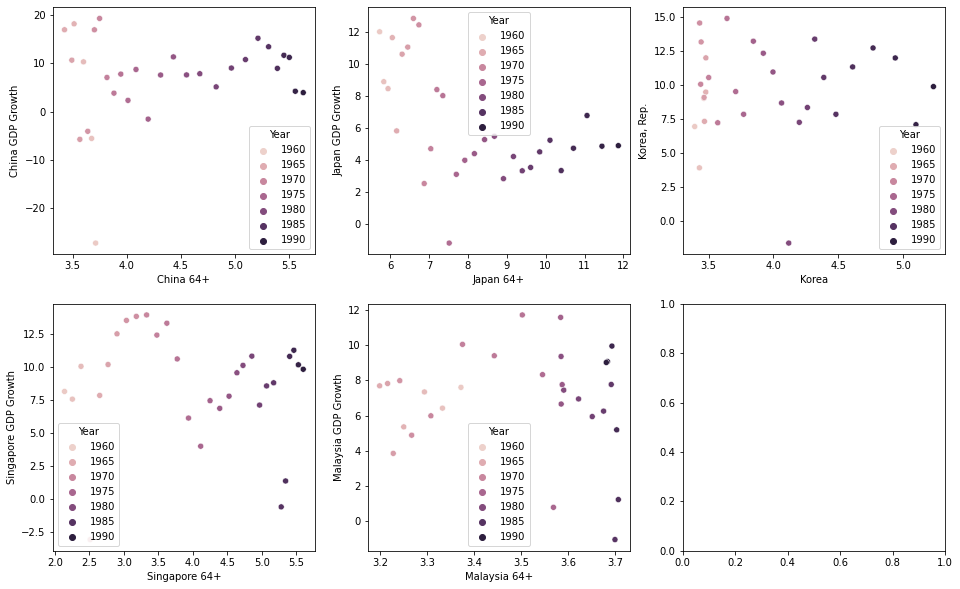

In [19]:
df = pd.merge(Age64_Past, GDP_Growth_past, how ='left', on = 'Year', suffixes = [' 64+', ' GDP Growth'])
fig, axes = plt.subplots(2,3, figsize = (16, 10))
sns.scatterplot(ax = axes[0,0], x= 'China 64+', y ='China GDP Growth', data = df, hue = 'Year')
sns.scatterplot(ax = axes[0,1], x= 'Japan 64+', y ='Japan GDP Growth', data = df,  hue = 'Year')
sns.scatterplot(ax = axes[0,2], x= 'Korea', y ='Korea, Rep.', data = df,  hue = 'Year')
sns.scatterplot(ax = axes[1,0], x= 'Singapore 64+', y ='Singapore GDP Growth', data = df, hue = 'Year')
sns.scatterplot(ax =axes[1,1], x = 'Malaysia 64+', y ='Malaysia GDP Growth', data = df, hue = 'Year') 

<AxesSubplot:xlabel='Malaysia 64+', ylabel='Malaysia GDP Capita Growth'>

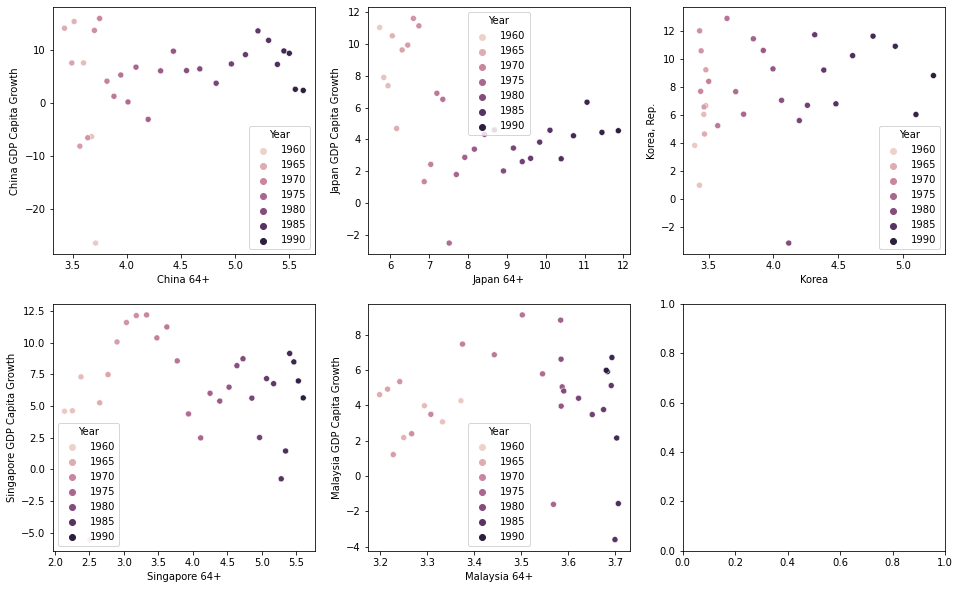

In [22]:
df = pd.merge(Age64_Past, GDP_Per_Capita_Growth_past, how ='left', on = 'Year', suffixes = [' 64+', ' GDP Capita Growth'])
fig, axes = plt.subplots(2,3, figsize = (16, 10))
sns.scatterplot(ax = axes[0,0], x= 'China 64+', y ='China GDP Capita Growth', data = df, hue = 'Year')
sns.scatterplot(ax = axes[0,1], x= 'Japan 64+', y ='Japan GDP Capita Growth', data = df,  hue = 'Year')
sns.scatterplot(ax = axes[0,2], x= 'Korea', y ='Korea, Rep.', data = df,  hue = 'Year')
sns.scatterplot(ax = axes[1,0], x= 'Singapore 64+', y ='Singapore GDP Capita Growth', data = df, hue = 'Year')
sns.scatterplot(ax =axes[1,1], x = 'Malaysia 64+', y ='Malaysia GDP Capita Growth', data = df, hue = 'Year') 
